<a href="https://colab.research.google.com/github/stethbo/PWr/blob/main/symulacja_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime

Losujemy wektor 'zamówień' z rozkładu normalnego wybieramy 200 wartości odpowiadających o której godzinie zostało złożone zamówienie. Listę tą sortujemy od najmniejszej wartości aby odpowiadalo to logice kolejności w czasie.

['20:20:00', '18:34:00', '19:34:00', '20:31:00', '18:20:00', '19:22:00', '18:28:00', '18:47:00', '19:41:00', '18:10:00']


Text(0.5, 1.0, 'Rozkład ilości zamówień w czasie')

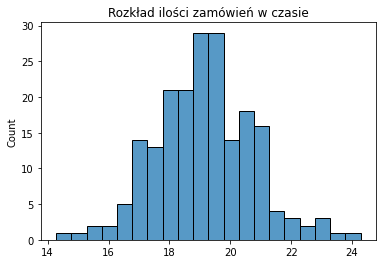

In [5]:
num_of_orders = 200
# z - lista godzin zamówień(od 15 do 23)
z = np.random.normal(19, 1.5, num_of_orders)

# konwersja godzin na minuty
z_minutes = z.copy()
z_minutes *= 60
z_minutes = np.round(z_minutes)
z_readable = list()
# konwersja na godzine w formacie dogodnym dla człowieka
for mins in z_minutes:
  hour = str(datetime.timedelta(minutes=mins))
  z_readable.append(hour)

print(z_readable[:10])

sns.histplot(z, binwidth=0.5, kde=False).set_title('Rozkład ilości zamówień w czasie')

Dla każdego zamówienia z wektora z losujemy jak daleko od restauracji trzeba dowieźć zamówienie.

Text(0.5, 1.0, 'Rozkład odległości dowozów')

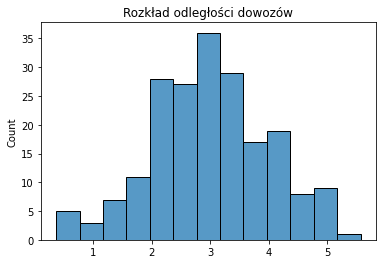

In [6]:
distances = abs(np.random.normal(3, 1, num_of_orders))
sns.histplot(distances, binwidth=0.4, kde=False).set_title('Rozkład odległości dowozów')

Następnie łączymy wektor zamówień z wektorem dystansów

In [11]:
dist_time = list(zip(distances, z_minutes, z_readable))
print(dist_time[:10])
orders = sorted(dist_time, key=lambda x: x[1])
print(orders[:10])

[(2.8613181358106887, 1220.0, '20:20:00'), (2.11554132478997, 1114.0, '18:34:00'), (2.1881934939614993, 1174.0, '19:34:00'), (2.557988576506731, 1231.0, '20:31:00'), (2.3292056746485317, 1100.0, '18:20:00'), (4.2605924329573295, 1162.0, '19:22:00'), (4.073906818709044, 1108.0, '18:28:00'), (5.005504996118383, 1127.0, '18:47:00'), (2.999479313541475, 1181.0, '19:41:00'), (3.3523546431246247, 1090.0, '18:10:00')]
[(4.043742981468476, 857.0, '14:17:00'), (1.5987639624014118, 890.0, '14:50:00'), (3.1164021640506467, 922.0, '15:22:00'), (2.573400872304859, 946.0, '15:46:00'), (2.358423881523844, 962.0, '16:02:00'), (2.786070008802249, 973.0, '16:13:00'), (3.411616365261205, 981.0, '16:21:00'), (2.38730010057355, 984.0, '16:24:00'), (3.023537378765074, 995.0, '16:35:00'), (2.929102622098872, 1000.0, '16:40:00')]


In [12]:
c_type = list()
c_price  = list()
amounts = {'rower': 4, 'hulajnoga': 3, 'skuter': 2}
speeds = {'rower': 18, 'hulajnoga': 22, 'skuter': 40}
prices = {'rower': 22, 'hulajnoga': 28, 'skuter': 35}

for name in amounts:
  for i in range(amounts[name]):
    c_type.append(speeds[name])
    c_price.append(prices[name])

print(c_type)
print(c_price)

couriers = np.zeros_like(c_type)
start_time = orders[0][1]
cur_time = orders[0][1]
total_time = 0
total_cost = 0

[18, 18, 18, 18, 22, 22, 22, 40, 40]
[22, 22, 22, 22, 28, 28, 28, 35, 35]


Pętla symulująca upływ czasu. Dodaje kolejne zlecenia kurierom gdy nie są w trakcie żadnego innego zlecenia. Sumuje koszt oraz zlicza całkowity czas dostarczenia wszystkich zamówień.

In [13]:
while orders:
  for c in range(len(couriers)):
    if couriers[c] > 0:
      couriers[c] -= 1
    elif len(orders) > 0 and couriers[c] == 0 and cur_time >= orders[0][1]:
      t = orders.pop(0)[0] / c_type[c]
      couriers[c] = round(t * 60) * 2
      total_cost += t * c_price[c]
  cur_time +=1
  total_time += 1  


In [14]:
total_time += max(couriers)
print(total_time)
print('Total time: ', datetime.timedelta(minutes=round(total_time)))
print('Total cost: ', total_cost)
print('All orders shipped')

626
Total time:  10:26:00
Total cost:  676.6266486109058
All orders shipped
